

# Project: Investigating & Exploring TMDB-Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


For this project, I have selected the **'tmdb movies'** dataset. This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings, budget, genres, popularity and revenue. 

Let's begin with loading the necessary packages/libraries into our workspace. 

In [47]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
% matplotlib inline

In this dataset, we'll be primarily trying to explore the following questions:

**1.** *Which genre earns the maximum money at the box office?* 

**2.** *Is there any relationship between the budget and popularity of a movie?*

**3.** *What factors can have an impact on the rating of a movie?*

We will also look at a few extra questions, such as :

**a.** *Who are the top 1% directors in terms of revenue generated?*

**b.** *How do Revenue, Popularity and Budget trend over time?*



<a id='wrangling'></a>
## Data Wrangling




Let's begin with data wrangling and cleaning. 
The first step is to load the dataset in our Jupyter library. Once loaded, the data needs to be imported in our workspace using pandas

In [48]:
# Importing data and having a look at the data types
df = pd.read_csv('tmdb-movies.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We can see that there are a total of 21 columns and 10866 entries(rows) in our dataset. It is also evident that there quiet a few missing values in the data. Steps need to be taken to deal with them before we move forward in analyzing our data.
But before we deal with them, let's first have a look at the descriptive statistics of the data.

In [49]:
# Looking at Descriptive Statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The objective of descriptive statistics is to summarizes the features of the data, for ex:- *Mean, Max, Min* etc.
If we look at the table above, we can know a lot about the dataset. For example, average **'Runtime'** is 102 minutes. The longest film had a runtime of 900 minutes and the **heighest rating** achieved by a film was 9.2/10
Simmilarly, we can understand a lot about the data by looking at max/min/25%/75% values for all the variables.



Now , let's preview our dataset bylooking at the first 5 rows.

In [50]:
# Looking at the first 5 rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
# Looking at the names of all the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Now let us look at the number of rows with missing entries as well the number of duplicate values.

In [52]:
# finding out the number of missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [53]:
# finding the number of duplicate rows
df.duplicated().sum()

1

It is clearly evident that there are quite a lot of missing values in the dataset. The column 'hompage' has 7930 missing values.
The column 'overview' has the lowest number of missing values, i.e., 4

In terms of duplication, there is only one duplicate row. This shouldn't create a lot of problem.



### Data Cleaning - Dropping Redundant Columns, Duplicate Values and Missing Rows

It's time to clean our dataset. The objective here is to remove unecessary information in the dataset, deal with duplicate and null values and simplify the complex values in columns to facilitate better interpretation of the data 

First, let us work on removing redundant columns from our dataset.
There are a few columns that we won't be needing while analyzing our data such as , **'id'**,  **'imdb_id'**,  **'homepage'**,  **'overview'**,  **'tagline'**,  **'keywords'**.

Why are we removing them? It is because the information they provide will not help us in answering the questions we are trying to explore.

Will *Id'*s help us in figuring out the relationship between popularity and budget? Will the movie's tagline in any way assist us in examining the factors that affect the rating of a movie?
The answer is No. All these variables will be of no use to us moving forward in our analysis.
So, we remove them to make things more streamlined and convenient.

In [54]:
#dropping redundant columns
df = df.drop(['id','imdb_id','homepage','overview','tagline','keywords'], axis = 1)

Let's check whether the columns have been dropped froom the dataset

In [55]:
# Checking column names
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Now, for making things simpler, let's get rid of the null values as well as the duplicate row.

In [56]:
#checking number of Null values once again
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [57]:
#removing null values
df.dropna(inplace = True)

In [58]:
#checking if null values have been removed
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

All Null values have been removed from the dataset.

In [59]:
# removing duplicate rows
df.drop_duplicates(inplace = True)


In [14]:
# checking if duplicate row has been removed
df.duplicated().sum()

0

Duplicate row has also been removed.

Now, let's move onto something complex. 
In this dataset , we have to try to explore which genre earns the maximum money at the box office. To achieve that, we have to look at the relationship between the values in the column **'genre'** and **'revenue'**
However, the column 'genre' contains multiple values separated by pipe (|) characters. For example: - Action|Adventure|Comedy|Thriller.
This makes comparing genre with anything complex. Also, it is difficult to comprehend how a movie has 4 genres all together.

So, to make things easier, we will consider only the first genre of a movie instead of all four. To make that happen, we will separate the genre column into a separate column named 'primary genre'.
We are essentially trying to split column by the separater "|" to get the first value and ignore the other values.

This will simplify the values in 'genre' and allow us to examine their relation with values in other columns in a simpler manner.

Also, we will create a replica of our dataset and perform the column splitting operation on it. The point is to not change the original orientation of our dataset.


In [60]:
#Creating a replica
df_v1 = df

In [67]:
#splitting genre column into a separate column
new = df_v1["genres"].str.split("|", n = 3, expand = True) 
df_v1["primary_genre2"] = new[0]


In [68]:
df_v1.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genre2
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [17]:
#creating a new genre column
df_v1["primary_genre"]= new[0] 

In [18]:
#dropping the column 'genres' so as to replace it with the newly created 'primary_genre' column
df_v1 = df_v1.drop("genres", axis = 1)

Let's have a look at the first 5 rows to check whether the code has run smoothly

In [19]:
#checking the first 5 rows
df_v1.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genre
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


Before moving onto EDA, let's also find out the uniques values in **'primary_genre'**

In [20]:
#checking uniques values in primary_genre
df_v1['primary_genre'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [21]:
#number of unique values in primary_genre
df_v1['primary_genre'].nunique()

20

Great! We have 20 uniques Genres. 

Finally, it's time for **EDA**

<a id='eda'></a>
## Exploratory Data Analysis

Now, let us move onto *Exploratory Data Analysis.*
In this part, we will compute statistics and create visualizations to sumarize the dataset's main characteristics and figure out what the data can tell us beyong the formal modelling task.

We will start with trying to find out the answers to the questions we decided to explore in the beginning of the report.

Let us move ahead with the first question:

### Is there a relationship between the budget and popularity of a moive?

In order to analyse the relationship between budget and popularity, we must begin with understanding the distribution and nature of both the variables. This can be done by plotting histograms of both the variables.

After that, how both of them behave with respect to each other must be looked at. This can be achieved through plotting a scatter plot between these two.

**Let's start with the Histograms**.


Text(0,0.5,'Frequency')

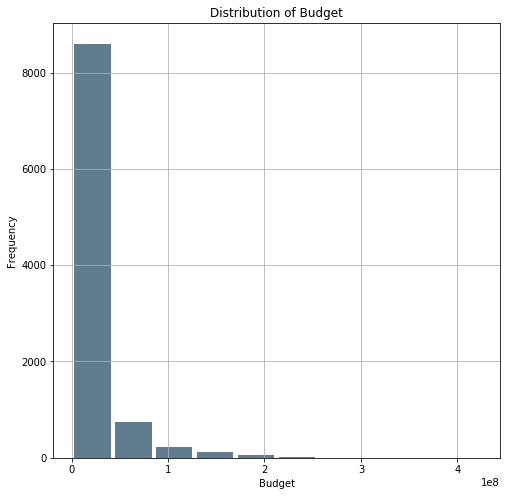

In [22]:
#plotting histogram for Budget,
df['budget'].plot(kind = 'hist',figsize=(8,8),grid = True,bins =10,rwidth = 0.9,color = '#607c8e')
plt.title("Distribution of Budget")
plt.xlabel("Budget")
plt.ylabel("Frequency")

It can be seen that most of the values in the column Budget are clustered around one bin. 

Text(0,0.5,'Frequency')

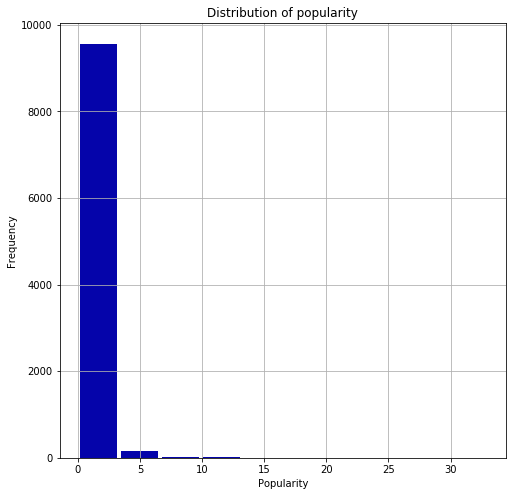

In [23]:
#plotting histogram for Popularity,
df['popularity'].plot(kind = 'hist',figsize=(8,8),grid = True,bins =10,rwidth = 0.9,color = '#0504aa')
plt.title("Distribution of popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")

Even here,we can be seen that most of the values in the column Popularity are clustered around one bin. (0-3)

After evaluating the histograms, we move on towards exploring the relationship bewteen Budget and Popularity.

**Let's plot their scatter plot.**

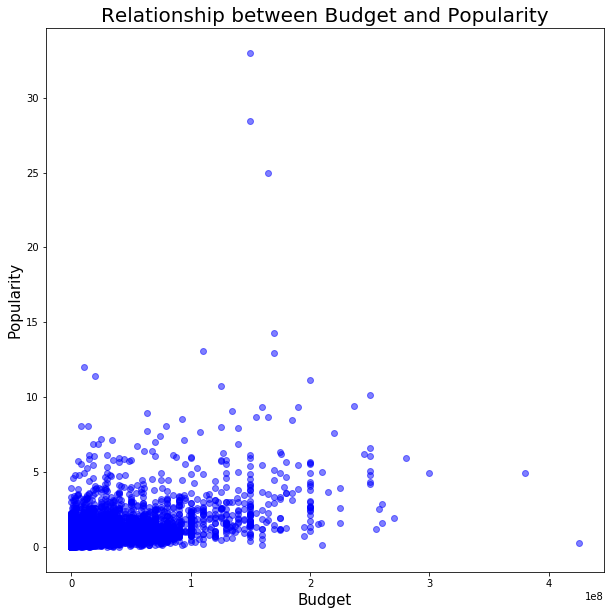

In [24]:
#plotting scatterplot betweenn bbudget and popularity
plt.figure(figsize =(10,10))
plt.scatter(df['budget'],df['popularity'], color = 'blue',alpha = 0.5)
plt.title("Relationship between Budget and Popularity",fontsize = 20)
plt.xlabel("Budget",fontsize = 15)
plt.ylabel("Popularity",fontsize = 15)
plt.show()


It is difficult to draw a meaningful conclussion by looking at this plot. The data points look too cluttered. 
*Although, there is some degree of positive relationship between the two variables.*

To get more clarity on this, let's calculate the correlation between the two variables.

**Correlation** *measures the strength of the association between two variables and the direction of the relationship.*

In [25]:
#Calculating correlation between Budget and Popularity. 
# To do that, we'll create a dataset that contains only budget and popularity. 
# Then we will calculate the correlation matrix 
df_c = df.loc[:,['budget','popularity']]
df_c.corr(method = 'pearson')

,budget,popularity
budget,1.000000,0.538921
popularity,0.538921,1.000000



The correlation between the two is **53.89%**. 
This shows that there is a positive relationship between budget and popularity. If budget is high, there is a good chance that popularity will also be good. Though,this does not imply causation.
If we think about it, high budget can result in hiring of big names in the movie as well as better efforts in marketing. This might increase the popularity of a film. However, this can simply be a co-incidence as well. 

Let's also try to understand if there is some relationship between popularity and revenue. We have looked at the relation between budget and popularity. I think it is sensible to see how budget interacts with other variables such as revenue.

**The key question here is - Do popular movies generate more revenue?**

*We move straightaway towards analyzing scatter plots and evaluating correlation*

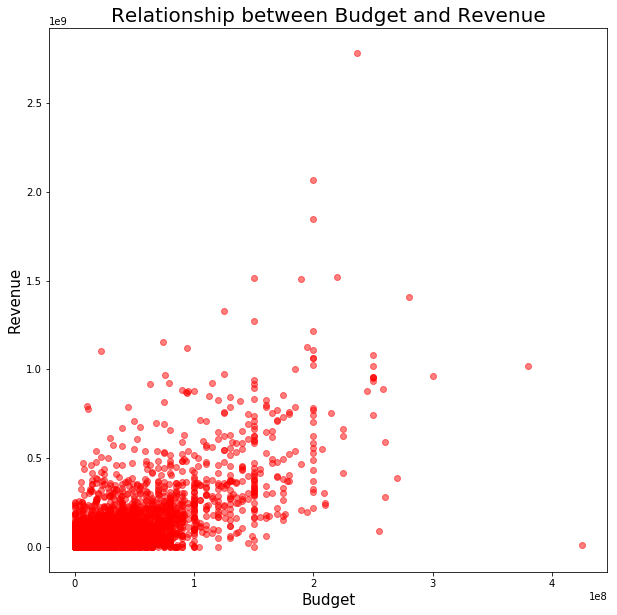

In [26]:
#Plotting scatterplot between budget and revenue
plt.figure(figsize =(10,10))
plt.scatter(df['budget'],df['revenue'], color = 'red',alpha = 0.5)
plt.title("Relationship between Budget and Revenue",fontsize = 20)
plt.xlabel("Budget",fontsize = 15)
plt.ylabel("Revenue",fontsize = 15)
plt.show()


By looking at the plot, it is evident that there exists a positive relationship between Budget and Revenue. The plot looks a bit cluttered near the origin. However, as we move away from the origin, it can be seen that there is a positive association between the two variables.

*Let's calculate their correlation coefficient for better understanding*

In [27]:
#Calculating correlation between Budget and Revenue. 
# To do that, we'll create a dataset that contains only budget and revenue. 
# Then we will calculate the correlation matrix 
df_c1 = df.loc[:,['budget','revenue']]
df_c1.corr(method = 'pearson')

,budget,revenue
budget,1.000000,0.731204
revenue,0.731204,1.000000


**Great!** The correlation between the two is **73.12%**. There is a strong relationship with budget and revenue. If the budget is high , there is good chance that reveue is going to be high as well.

If we think about it, most of the high budget films have famous actors and are marketed heavily. This can lead to more public appeal which in turn can generate higher revenue. Again, correlation doen not imply causation. The strong relation between the two might be because of some indirect causation or it might be a consequence of some common cause. Some more factors must be considered before we are very sure about the cause of this relation. However, that is beyond the scope of this report.



After analyzing the relationship between Budget and Revenue as well as Budget and Popularity, we wonder if *it's possible that Revenue of a film gets affected by both Popularity and budget?*

To dig deep into this, we have to use **multiple linear regression** and see how revenue of a film depends on budget and popularity

**Note:-** Regression Modelling is not a part of EDA. This is being done only out of sheer curiosity.

In [28]:
#Using multiple Linear Regression model
import statsmodels.api as sm
x = df[['budget','popularity']]
Y = df['revenue']
X = sm.add_constant(x)
Reg = sm.OLS(Y,X).fit()
Reg.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     8540.
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        12:44:52   Log-Likelihood:            -1.9092e+05
No. Observations:                9772   AIC:                         3.819e+05
Df Residuals:                    9769   BIC:                         3.819e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.93e+07   9.09e+05    -21.233      0.000   -2.11e+07   -1.75e+07
budget         2.0072      0.028     72.793      0.000       1.953       2.061
popularity  4.471e+07   8.57e+05     52.198      0.000     4.3e+07    4.64e+07
==============================================================================
Omnibus:                     9979.524   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3475448.457
Skew:                           4.412   Prob(JB):                         0.00
Kurtosis:                      94.966   Cond. No.                     5.02e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ignore all the other values except *R-squared*. The value of R-squared in this model is **63.6%**.
This means that budget and popularity together can explain about 63.6% variability in the revenue. This means that there exists a moderate association between budget, Popularity and Revenue. 

*With these relationships examined , let's move on towards our second question!* 

### What factors can have an impact on the ratings of a film?

Let's try to understand how the average rating of a film gets affected by various other variables such as Budget, Popularily, Revenue, Runtime and Votecount

To do this, it is appropriate to start with exploring relationships between Average rating and the above mentioned variables.

We can achieve this by plotting a **scatter plot matrix.** To make this task easier, we'll create a dataset that contains only Average Rating , Budget, Popularity, Revenue, Runtime and Votecount.

Let's get on to it!


In [29]:
#Creating a new dataset
df_v2 = df.loc[:,['vote_average','budget','popularity','revenue','runtime','vote_count']]

We will use the seaborn library to get a better looking scatter plot matrix. The objective is to examine the relationship of 'vote_average' with all other variables.

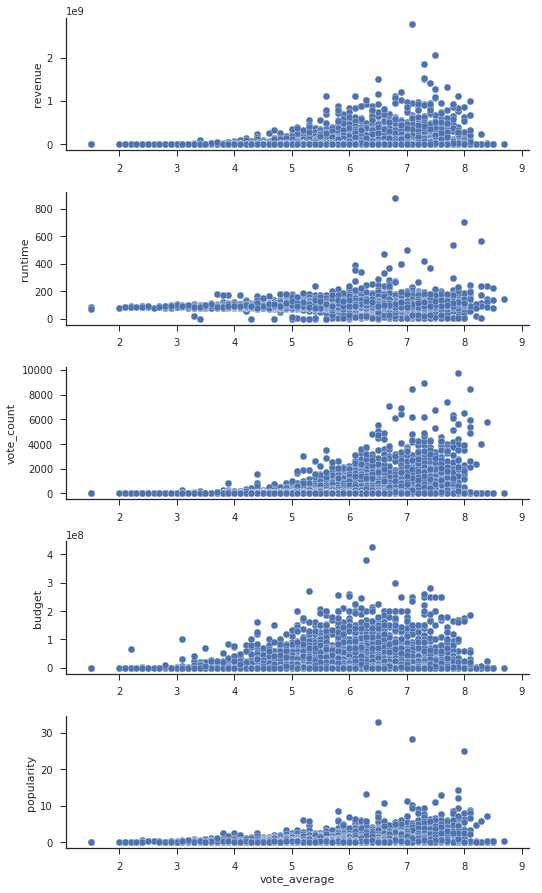

In [30]:
#Plotting Scatterplot Matrix with Vote_Average being the key variable.
sns.set(style = 'ticks')
sns.pairplot(df_v2, x_vars = ['vote_average',]
            ,y_vars = ['revenue','runtime','vote_count','budget','popularity'],aspect = 3)

All Scatterplots appear to be cluttered.

However, it can be seen that there exists some positive relation between vote_counts and vote_average. It suggests that when there are high number of votes, it is likely that the average rating will be good.

To get more details, let's see the correlation matrix!

In [31]:
#Looking at the correlation Matrix
df_v2.corr(method = 'pearson')

,vote_average,budget,popularity,revenue,runtime,vote_count
vote_average,1.000000,0.096051,0.239121,0.192026,0.193973,0.279851
budget,0.096051,1.000000,0.538921,0.731204,0.214292,0.627068
popularity,0.239121,0.538921,1.000000,0.662405,0.156290,0.802956
revenue,0.192026,0.731204,0.662405,1.000000,0.183293,0.788533
runtime,0.193973,0.214292,0.156290,0.183293,1.000000,0.184285
vote_count,0.279851,0.627068,0.802956,0.788533,0.184285,1.000000


We need to focus only on the correlations of vote_average with all other variables.

It can be clearly seen that the correlations are not at all strong. These are weak correlations. The highest figure that we can see is **27.91%**.

We can think that all these variables do not really affect the average rating of a movie. Even though correlation does not imply causation, it's role is very important in understanding how two or more variables interact with each other.

There is an interesting insight that we can derive from the above table. The correlation between 'vote_count' and 'popularity' is **80.29%**. That is huge! *Do popular movies get more votes?* That is a question for another day!

Well,  since we have already analyzed relationships between Budget, Popularity and Revenue, it would be wise and interesting to see how these three variables are trending over time. To figure this out, we must plot a line chart of the three variables with respect to **'release_date'**.

We will plot the line chart on an *'AxisSubplot'* object. This helps us in adding labels to our plot.

Let's move forward!

Text(0,0.5,'Revenue')

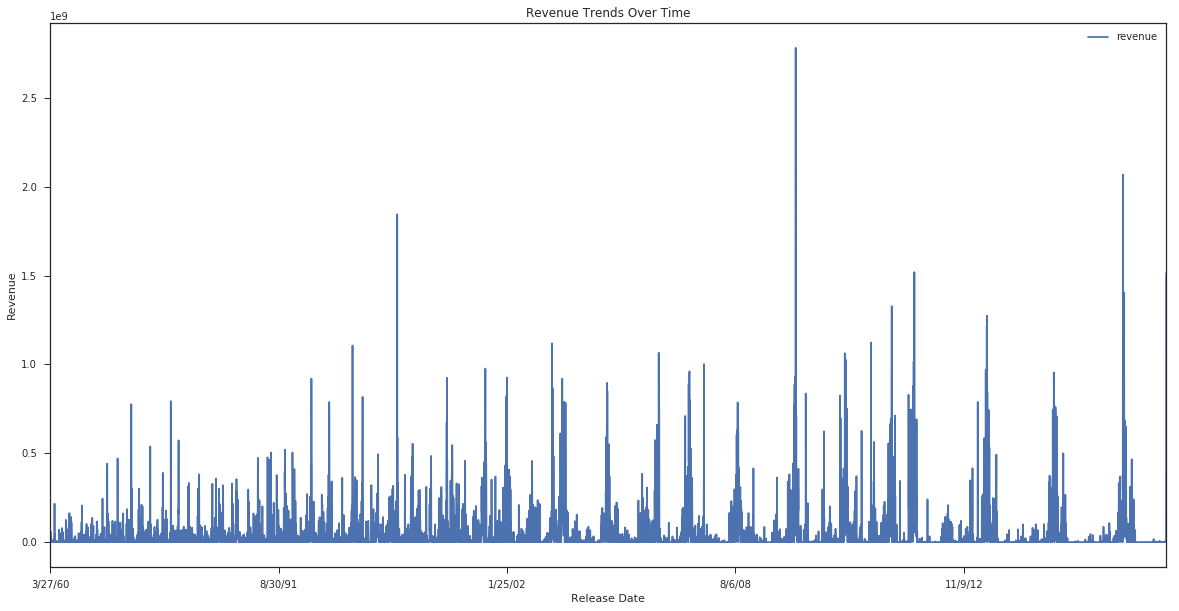

In [32]:
#Plotting Line chart for Revenue Over Time & Sorting Date in Ascending Order
df.sort_values('release_year', ascending = True,inplace = True)
ax = df.plot.line(x = 'release_date',y = 'revenue',figsize= (20,10),title = "Revenue Trends Over Time")
ax.set_xlabel('Release Date')
ax.set_ylabel('Revenue')

*The plot looks cluttered. Difficult to arive at siginificant conclusions.*

Revenue appears to constant over time. Any upward/downward trend in not clearly visible. It can be seen the highest revenue earned was somewhere between *2008 and 2010.*

Text(0,0.5,'Budget')

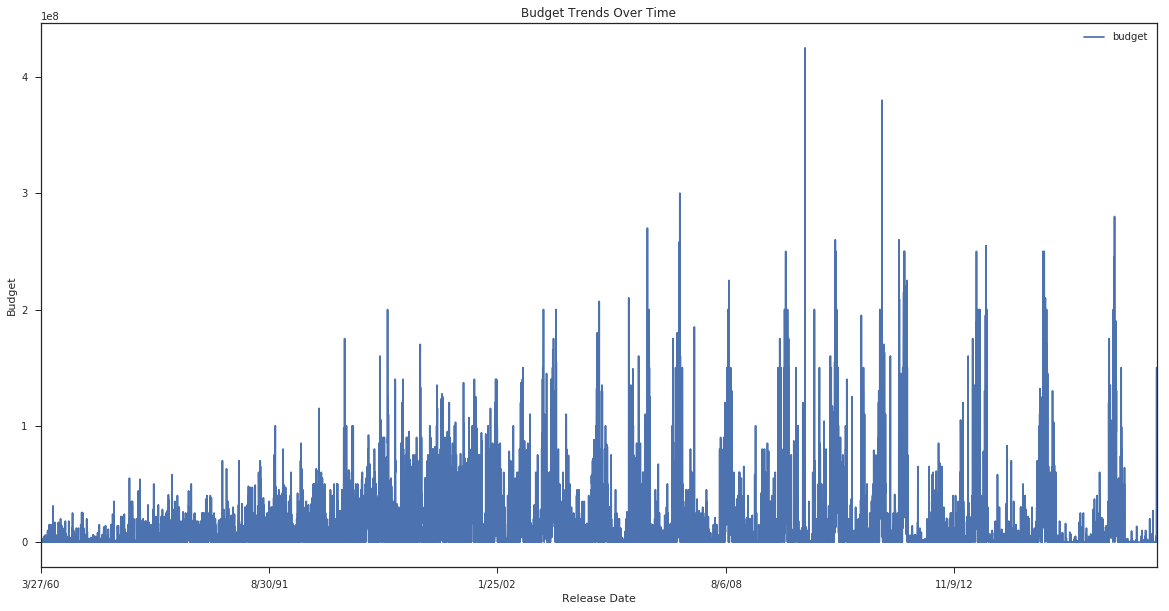

In [33]:
#Plotting Line chart for Budget Over Time
ax = df.plot.line(x = 'release_date',y = 'budget',figsize= (20,10),title = "Budget Trends Over Time")
ax.set_xlabel('Release Date')
ax.set_ylabel('Budget')



*The plot looks cluttered. Difficult to arive at siginificant conclusions.*

*Maximum budgets in the early 60's & 70's were significantly lesser than the maximum budgets in 90's and early 2000's.*

Any upward/downward trend in not clearly visible. It can be seen the highest budget allocated was somewhere between *2008 and 2010.*

Text(0,0.5,'Popularity')

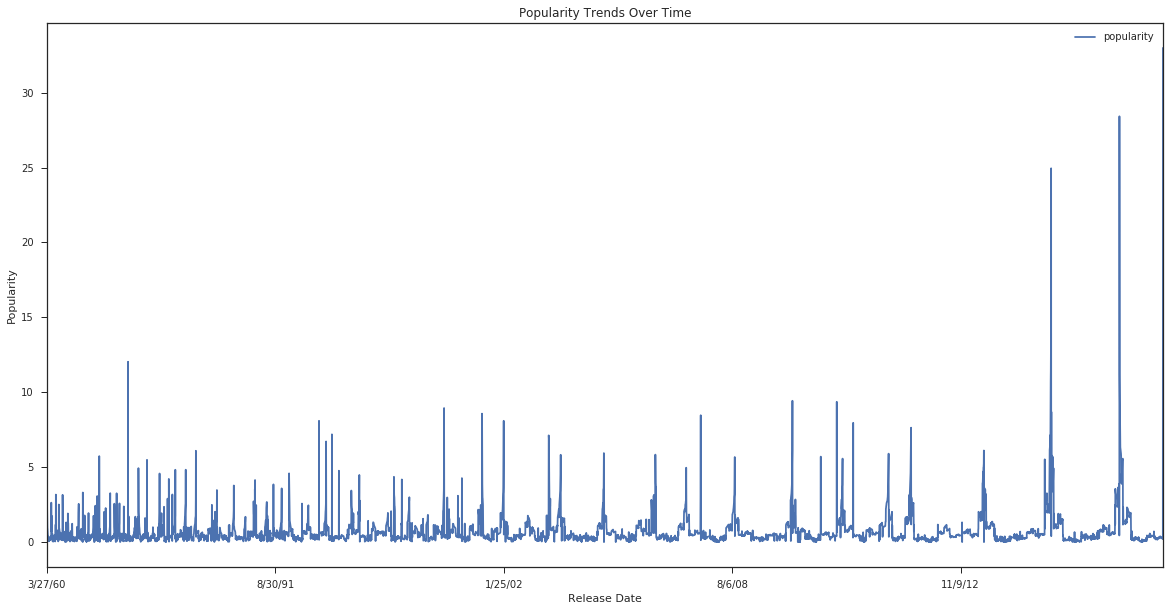

In [34]:
#Plotting Line chart for Popularity Over Time
ax = df.plot.line(x = 'release_date',y = 'popularity',figsize= (20,10),title = "Popularity Trends Over Time")
ax.set_xlabel('Release Date')
ax.set_ylabel('Popularity')


*The plot looks less cluttered than the previous two plots. However, it is still difficult to arive at siginificant conclusions.* 

Popularity appears to constant over time. Any upward/downward trend in not clearly visible. It can be seen the highest popularity score achieved  was somewhere after *2012.*

Now, let's move on to our Final question!

### Which Genre earns the maximum money at the box-office?

Before we begin with this, we need to recall that we created a new dataset in which we separated genre into a new column: 'primary_genre'. We will be working on that dataset in this section.

We are going to examine revenue with resepct to 'primary_genre' 

Using 'groupby()' operation, we will identify unique values in primary genre and evaluate their respective revenues!

Let's begin with it!

In [85]:
#Using Groupby to find out revenues for all genres in primary genre
primary_genre = df_v1.groupby('primary_genre2')['revenue'].sum()['revenue'].count()
primary_genre

SyntaxError: invalid syntax (<ipython-input-85-91fb826ce7fd>, line 2)

**Total Revenues for each genre can be seen in the above table!** Let's look at the maximum and minimum revenues and their respective genre!

In [36]:
# Genre with maximum revenue
max = {primary_genre.idxmax(),primary_genre.max()}
max

{96487224972, 'Action'}

In [37]:
#Genre with minimum revenue
min = {primary_genre.idxmin(),primary_genre.min()}
min 

{0, 'Foreign'}

Foreign Genre has a minimum revenue of 0. This is a pretty strange thing to observe! There might be some issue with the data. Maybe data wasn't recorded properly.

Action Genre has the heighest revenue of 96487224972.

Now, let us try to plot the same results for better interpretation.

First, let's convert the above series into a dataframe. This will make plotting a bar chart easier. Also, it is important to convert index into a column so that it's values are easier to access while writing code for visualizing the bar chart.

Let's begin!

In [38]:
#Converting Series to a dataframs and converting index to a column
genre_df=pd.DataFrame(primary_genre)

genre_df.reset_index(level = 0,inplace = True)

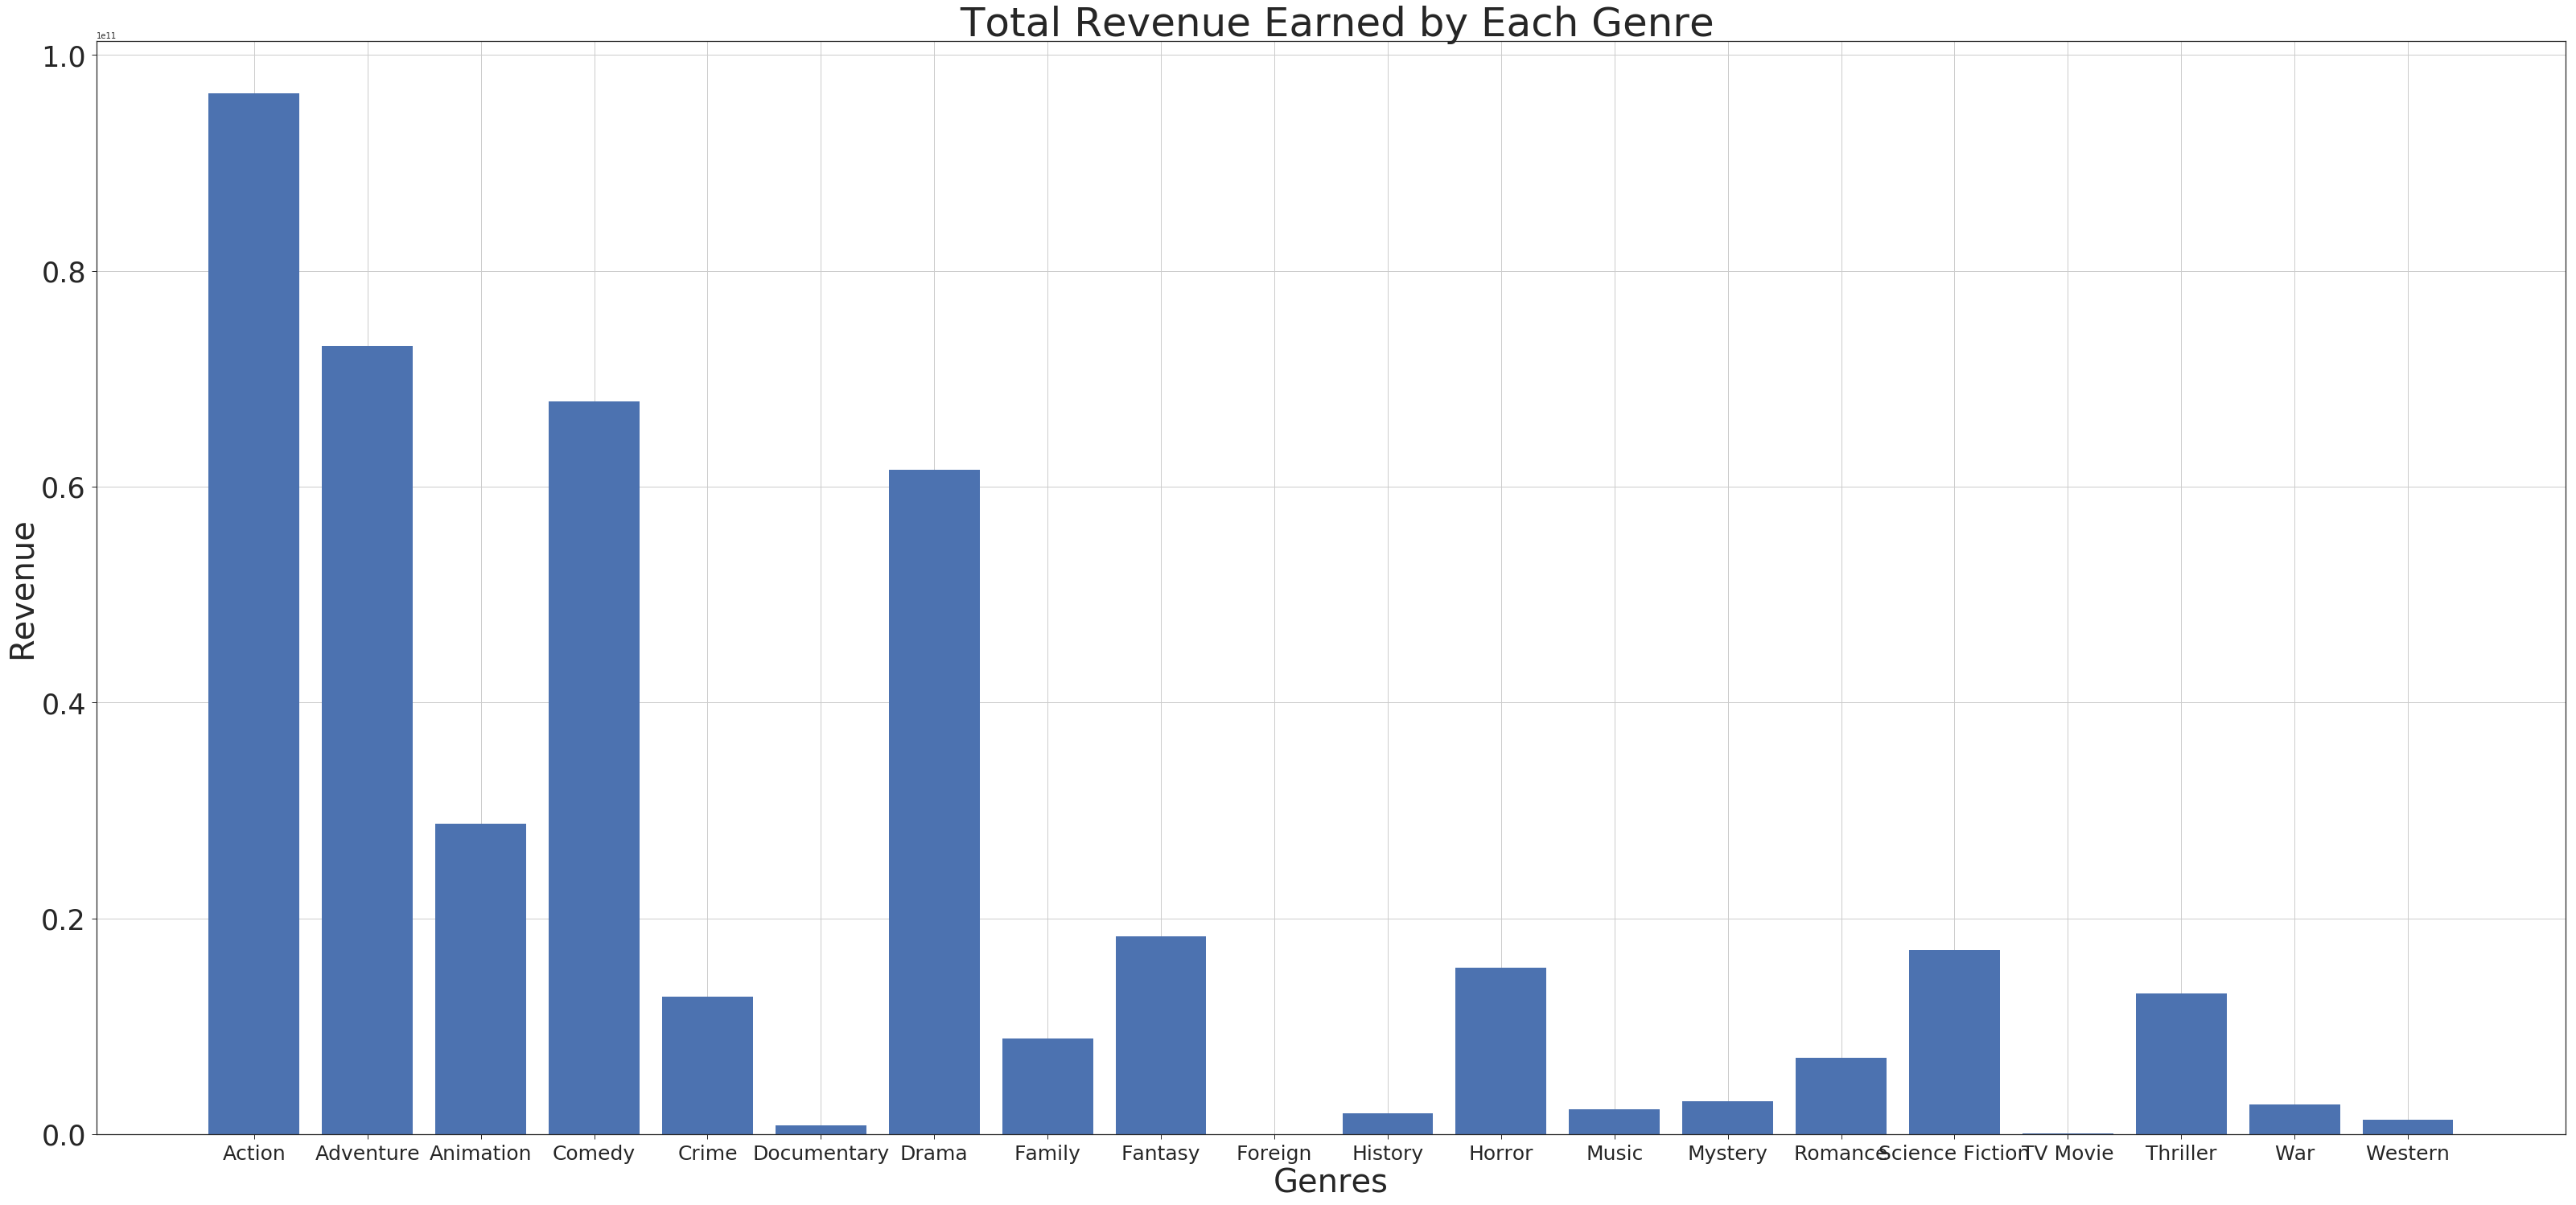

In [39]:
#Plotting Bar Plot to visualize results using matplotlib
location = np.arange(len(primary_genre))
labels =  genre_df.iloc[:,0]
height = genre_df.iloc[:,1]
plt.figure(figsize = (55,25))
plt.bar(location, height,tick_label = labels,width = 0.8)
plt.xticks(size = 25)
plt.yticks(size = 35)
plt.title(' Total Revenue Earned by Each Genre',size = 50)
plt.xlabel('Genres',size = 40)
plt.ylabel('Revenue',size = 40)
plt.grid(True)


The same results can be seen in the above plot. Due to limited space, the lables appear a bit smaller.

*We can clearly see how Action genre earns the highest revenue, followed by Adventure and Comedy.*

*The genre Foreign earns no revenue. The other two genres which earn the lowest revenue are Documentary and Western.*


Since we have analyzed revenues with respect to genre, it will be wise to analyze revenues with respect to Directors.

Exploring the top money generating directors might lead us towards some interesting information.

First of all, we will figure out the 99th percentile value for  revenue. Then we will create a new dataset that contains only the top 1 percent values for revenue.

After this, we will use the 'groupby()' function to come up with the top 1% directors.

Let's begin!

In [40]:
#Calculating 99th percentile revenue
rev = np.percentile(df['revenue'],99)
rev

622323878.01999807

In [41]:
#Creating a new dataset that contains only the top 1% revenues
high_revenue  = df[df.revenue > rev ]


In [42]:
#Creating a list of top 1% directors.
top_director = high_revenue.groupby('director')['revenue'].sum()
top_director

director
Alfonso CuarÃ³n                              1506197259
Andrew Adamson                                748806957
Andrew Adamson|Kelly Asbury|Conrad Vernon     919838758
Andrew Stanton|Lee Unkrich                    864625978
Barry Sonnenfeld                              624026776
Bill Condon                                  1541171856
Bob Peterson|Pete Docter                      731342744
Brad Bird                                    1326155472
Brad Bird|Jan Pinkava                         623722818
Bryan Singer                                  746000000
Carlos Saldanha                              1547627597
Chris Buck|Jennifer Lee                      1274219009
Chris Columbus                               1853164032
Chris Miller|Raman Hui                        798958165
Chris Weitz                                   709827462
Christopher McQuarrie                         682330139
Christopher Nolan                            2908463112
Colin Trevorrow                        

Above, we can see a list of top 1% directors in terms of Revenue generated! Their names and respective revenues can be seen!

*Let's find out which director generated the highest revenue!*

In [43]:
# Director with maximum revenue
max = {top_director.idxmax(),top_director.max()}
max

{5847068099, 'Peter Jackson'}

**Peter Jackson** is at the top in terms of revenue generated. His movies generated a staggering revenue of **5847068099.**

Now, Let's move on to Conclusions!

<a id='conclusions'></a>
## Conclusions

**1)** *By only evaluating numeric columns in the dataset, it is difficult to determine what affects the average rating of a film !*

**2)** *It is highly likely that popular movies attract more votes!* *What causes this still not very clear!*

**3)** *Budget and Popularity together can explain quite a lot of variability in Revenue. There exists a moderate association between budget, popularity and revenue.*

**4)** *If the budget of a movie is high, there is good chance that the movie will earn well at the box - office and vice-versa. However, this doesn't mean that one causes another.*


**5)** *If the budget of a movie is high, there is good chance that it's popularity will also be more and vice-versa. However, this doesn't mean that one causes another. This positive relationship might be a consequence of some common cause*

**6)** *Action Genre earns the most amount of money at the box office, followed by Adventure.*


**7)** *Foreign Genre earns no money at the box office. The second worst genre (after Foreign), is Documentary*


**8)** *Peter Jackson's movies generated the highest revenue at the box office. His movies earned a total of '5847068099' in revenue*


**9)** *It is difficult to draw significant conclusions on how Budget, Popularity and Revenue trend over time*


<a id='conclusions'></a>
## Limitations

**1)** *A few columns have been dropped form the dataset. This might result in missing a few interesting insights!*

**2)** *Removal of missing values from variables of our interest might result in unintentional bias towards relationships being analyzed.*

**3)** *Only the first value in Genres column has been considered for convinience. Missing out on the analysis of next three values might have resulted in loss of information and interesting insights*

**4)** *Since correlation does not imply causation, the reasons behind positive relationships between budget & revenue as well as budget & popularity is unclear.*

**5)** *The analysis has relied primarily on descriptive statistics and as a result no significant inferences have been made about the data.*

**6)** *The impact of production companies and few other variables has not been evaluated in the report.*

**7)** *The impact of inflation in budget and revenue over time has not been considered.*

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0